# Part VI

- The alternative fuel used in our team project will be the $NH_3 - H_2 - N_2$ blend obtained from NH3 cracking such that : 

$
NH_3 \leftrightarrow 1.5 \; H_2 + 0.5 \; N_2
$

- The cracking amount can be varied to obtain different combustion properties

## 1. Chemical model to use in Cantera

- Chemical kinetics models describing nitrogen oxydation in combustion have been originally used to model thermal $NO$ formation, such as the Konnov [1] mechanism. 

- More recent models derived from older models are more suited to $NH_3$ combustion modelling, such as the model from Xiao [2] wich will be used in our project.

- The Xiao combustion kinetics model contains 52 species and 272 reactions and was validated using experimental data in the 1-30 atm pressure range. 

- The relatively high number of species and reactions for a $NH_3$ oxydation mechanism should make it more accurate compared to the SanDiego [3] or the Jiang [4] mechanisms.

### References

1. KONNOV, A. A., & RUYCK, J. D. (1999). Kinetic Modeling of Nitrogen Oxides Decomposition at Flame Temperatures. Combustion Science and Technology, 149(1‑6), 53‑78. https://doi.org/10.1080/00102209908952099

2. Xiao, H., Valera-Medina, A., & Bowen, P. J. (2017). Modeling Combustion of Ammonia/Hydrogen Fuel Blends under Gas Turbine Conditions. Energy & Fuels, 31(8), 8631‑8642. https://doi.org/10.1021/acs.energyfuels.7b00709

3. University of California at San Diego. (2020). Chemical-Kinetic Mechanisms for Combustion Applications. San Diego Mechanism web page. Repéré à https://web.eng.ucsd.edu/mae/groups/combustion/mechanism.html

4. Jiang, Y., Gruber, A., Seshadri, K., & Williams, F. (2020). An updated short chemical‐kinetic nitrogen mechanism for carbon‐free combustion applications. International Journal of Energy Research, 44(2), 795‑810. https://doi.org/10.1002/er.4891


## 2. The global $NH_3 + H_2 + N_2$ combustion reaction

- For $X_{NH3} = X_{H2}$ which is a plausible case

$
(NH_3 + H_2 + 0.33 N_2) + 1.25 \; (O_2 + 3.76 \; N_2) \rightarrow 0.5 \; N_2 + 2.5 \; H_2O + 5.03 \; N_2
$

## 3. $T_{ad}$ as a function of $\phi$, $T_{in}$, $P_{in}$

- Values for $CH_4$ combustion are given as a reference

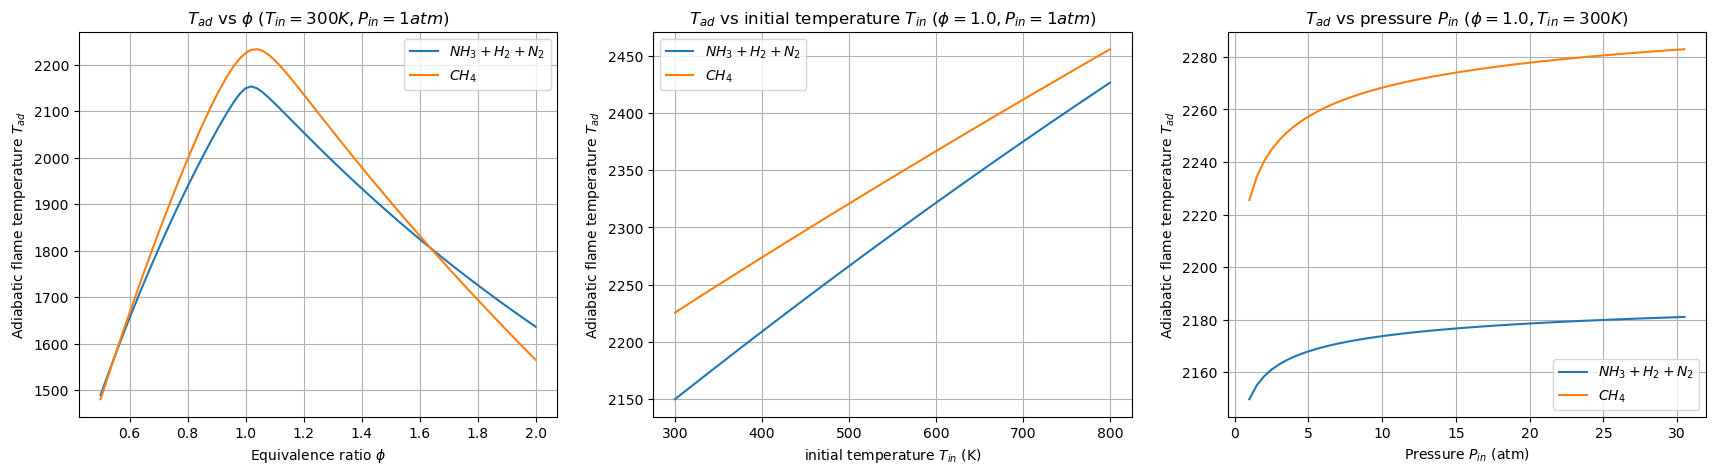

In [3]:
import cantera as ct
ct.suppress_thermo_warnings()
import numpy as np
import matplotlib.pyplot as plt

gas = ct.Solution('NH3_Xiao.yaml')
gas2 = ct.Solution('gri30.yaml')

fuel = "NH3:1.0, H2:1.0, N2:0.33"
air = "O2:1.0, N2:3.76"

phi_values = np.arange(0.5, 2.01, 0.02)
Tin_values = np.arange(300, 801, 20)
Pin_values = np.arange(1, 31, 0.5)*ct.one_atm

Tad_dPhi = []
Tad_dPhi2 = []
for phi in phi_values:
    gas.set_equivalence_ratio(phi, fuel, air)
    gas.TP = 300, ct.one_atm
    gas.equilibrate('HP')
    Tad_dPhi.append(gas.T)
    gas2.set_equivalence_ratio(phi, 'CH4', air)
    gas2.TP = 300, ct.one_atm
    gas2.equilibrate('HP')
    Tad_dPhi2.append(gas2.T)
    
Tad_dTin = []
Tad_dTin2 = []
for Tin in Tin_values:
    gas.set_equivalence_ratio(1.0, fuel, air)
    gas.TP = Tin, ct.one_atm
    gas.equilibrate('HP')
    Tad_dTin.append(gas.T)
    gas2.set_equivalence_ratio(1.0, 'CH4', air)
    gas2.TP = Tin, ct.one_atm
    gas2.equilibrate('HP')
    Tad_dTin2.append(gas2.T)
    
Tad_dPin = []
Tad_dPin2 = []
for Pin in Pin_values:
    gas.set_equivalence_ratio(1.0, fuel, air)
    gas.TP = 300, Pin
    gas.equilibrate('HP')
    Tad_dPin.append(gas.T)
    gas2.set_equivalence_ratio(1.0, 'CH4', air)
    gas2.TP = 300, Pin
    gas2.equilibrate('HP')
    Tad_dPin2.append(gas2.T)
    
fig, axs = plt.subplots(1, 3, figsize=(21, 5))

ax = axs[0]
ax.set_title(r'$T_{ad}$ vs $\phi$ $(T_{in} = 300 K, P_{in} = 1 atm)$')
ax.plot(phi_values, Tad_dPhi, label=r'$NH_3 + H_2 + N_2$')
ax.plot(phi_values, Tad_dPhi2, label=r'$CH_4$')
ax.set_xlabel(r'Equivalence ratio $\phi$')

ax = axs[1]
ax.set_title(r'$T_{ad}$ vs initial temperature $T_{in}$ $(\phi = 1.0, P_{in} = 1 atm)$')
ax.plot(Tin_values, Tad_dTin, label=r'$NH_3 + H_2 + N_2$')
ax.plot(Tin_values, Tad_dTin2, label=r'$CH_4$')
ax.set_xlabel(r'initial temperature $T_{in}$ (K)')

ax = axs[2]
ax.set_title(r'$T_{ad}$ vs pressure $P_{in}$ $(\phi=1.0, T_{in} = 300 K)$')
ax.plot(Pin_values/ct.one_atm, Tad_dPin, label=r'$NH_3 + H_2 + N_2$')
ax.plot(Pin_values/ct.one_atm, Tad_dPin2, label=r'$CH_4$')
ax.set_xlabel(r'Pressure $P_{in}$ (atm)')

for ax in axs:
    ax.set_ylabel(r'Adiabatic flame temperature $T_{ad}$')
    ax.grid()
    ax.legend()


## 4. Pollutants concentration after equilibrium

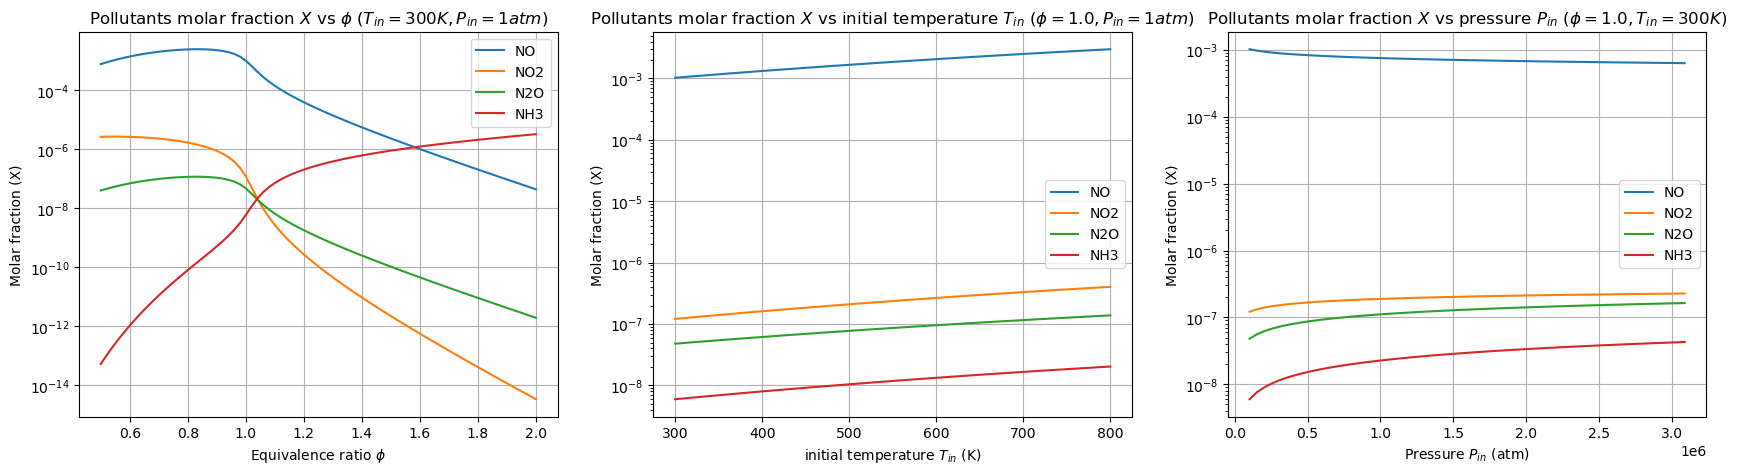

In [4]:
gas = ct.Solution('../../Combustion/Mechanisms/Cantera/NH3_Xiao.yaml')

fuel = "NH3:1.0, H2:1.0, N2:0.33"
air = "O2:1.0, N2:3.76"

phi_values = np.arange(0.5, 2.01, 0.02)
Tin_values = np.arange(300, 801, 20)
Pin_values = np.arange(1, 31, 0.5)*ct.one_atm

polluants = ['NO', 'NO2', 'N2O', 'NH3']

dP_dPhi = {}
dP_dTin = {}
dP_dPin = {}
for p in polluants:
    dP_dPhi[p] = []
    dP_dTin[p] = []
    dP_dPin[p] = []
    
for phi in phi_values:
    gas.set_equivalence_ratio(phi, fuel, air)
    gas.TP = 300, ct.one_atm
    gas.equilibrate('HP')
    for p in polluants:
        dP_dPhi[p].append(gas.X[gas.species_index(p)])
    
for Tin in Tin_values:
    gas.set_equivalence_ratio(1.0, fuel, air)
    gas.TP = Tin, ct.one_atm
    gas.equilibrate('HP')
    for p in polluants:
        dP_dTin[p].append(gas.X[gas.species_index(p)])
    
for Pin in Pin_values:
    gas.set_equivalence_ratio(1.0, fuel, air)
    gas.TP = 300, Pin
    gas.equilibrate('HP')
    for p in polluants:
        dP_dPin[p].append(gas.X[gas.species_index(p)])
    
fig, axs = plt.subplots(1, 3, figsize=(21, 5))

ax = axs[0]
ax.set_title(r'Pollutants molar fraction $X$ vs $\phi$ $(T_{in} = 300 K, P_{in} = 1 atm)$')
for p in polluants:
    ax.plot(phi_values, dP_dPhi[p], label=p)
ax.set_xlabel(r'Equivalence ratio $\phi$')

ax = axs[1]
ax.set_title(r'Pollutants molar fraction $X$ vs initial temperature $T_{in}$ $(\phi = 1.0, P_{in} = 1 atm)$')
for p in polluants:
    ax.plot(Tin_values, dP_dTin[p], label=p)
ax.set_xlabel(r'initial temperature $T_{in}$ (K)')

ax = axs[2]
ax.set_title(r'Pollutants molar fraction $X$ vs pressure $P_{in}$ $(\phi=1.0, T_{in} = 300 K)$')
for p in polluants:
    ax.plot(Pin_values, dP_dPin[p], label=p)
ax.set_xlabel(r'Pressure $P_{in}$ (atm)')

for ax in axs:
    ax.set_ylabel(r'Molar fraction (X)')
    ax.grid()
    ax.legend()
    ax.set_yscale('log')
